# The K-profile parameterization in `OceanTurb.jl`

Here we demonstrate how to set up a `Model` in `OceanTurb.jl`, set initial conditions and boundary conditions, and iterate the model forward.

In [1]:
using Pkg; Pkg.activate(".."); Pkg.instantiate()

using OceanTurb.KPP, PyPlot, PyPlotPlus

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`


┌ Info: Recompiling stale cache file /Users/gregorywagner/.julia/compiled/v1.0/OceanTurb/9iboO.ji for OceanTurb [d848d694-35fd-11e9-1c91-9995598ac29e]
└ @ Base loading.jl:1187


In [2]:
# First, we define the model.
model = Model(nz=200, Lz=100.0, K0=1);

# No-flux boundary conditions (the default)

When a `KPP.Model` is initialized, it assumes
a default no-flux boundary condition for `U`, `V`, `T`, and `S`.

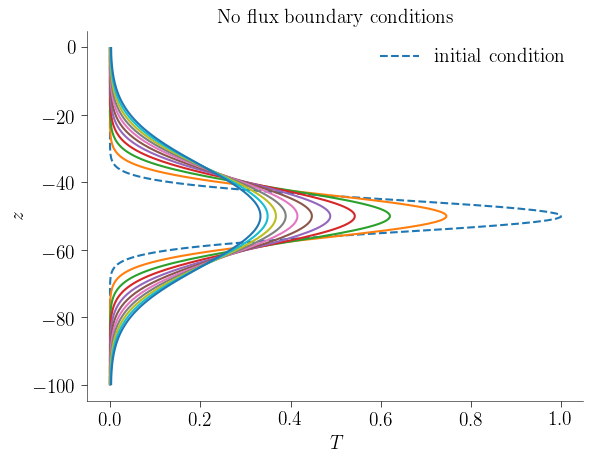

In [3]:
# Next we use a simple initial condition and iterate forward
Lz = model.grid.Lz
z0, dz = -Lz/2, Lz/20
T0(z) = exp(-(z-z0)^2 / 2dz^2)

# Set T to the function T0(z) --- enabled by some OceanTurb.jl syntactic sugar
model.solution.T = T0

# Initialize plotting
ax, fig = subplots()
xlabel(L"T")
ylabel(L"z")
title("No flux boundary conditions")
cornerspines()

plot(model.solution.T.data, zdata(model.solution.T), "--", label="initial condition")

# Run
dt = 0.01
nt = 1000
ni = 10

for i = 1:ni
    iterate!(model, dt, nt)
    plot(model.solution.T.data, zdata(model.solution.T))
end

legend();

# A constant flux boundary condition

Next, we demonstrate how to set a constant flux boundary condition in `OceanTurb.KPP`.

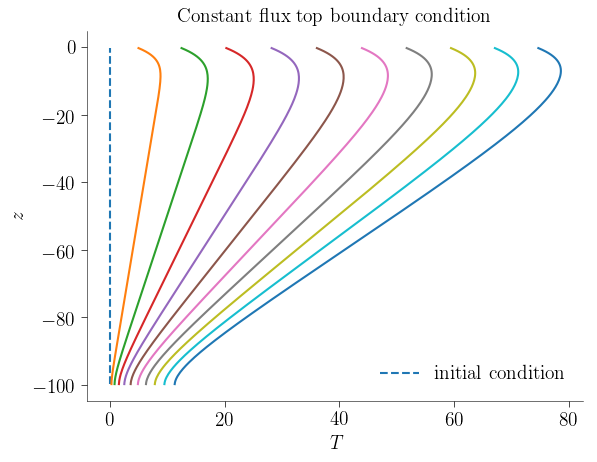

In [5]:
# Re-initialize the solution
model.solution.T = 0 # in OceanTurb.jl, this sets all grid values of T to 0.

# Set constant boundary conditions at top and bottom
set_bcs!(model, T=FluxBC(Top, 1.0))

# Initialize plotting
ax, fig = subplots()
xlabel(L"T")
ylabel(L"z")
title("Constant flux top boundary condition")
cornerspines()

plot(model.solution.T.data, zdata(model.solution.T), "--", label="initial condition")

# Run
dt = 0.01
nt = 1000
ni = 10

for i = 1:ni
    iterate!(model, dt, nt)
    plot(model.solution.T.data, zdata(model.solution.T))
end

legend();